In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the dataset
data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [6]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [7]:
# 1. Exploratory Data Analysis (EDA)
# Display summary statistics
print(data.describe())


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [8]:
data.shape

(1436, 11)

In [9]:
data=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Weight"]]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,1025
1432,10845,72,19000,86,1300,3,5,1015
1433,8500,71,17016,86,1300,3,5,1015
1434,7250,70,16916,86,1300,3,5,1015


In [10]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,1615.00000


In [11]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

In [12]:
data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [13]:
data[data.duplicated()].shape

(1, 8)

In [14]:
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
113,24950,8,13253,116,2000,5,5,1320


In [15]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


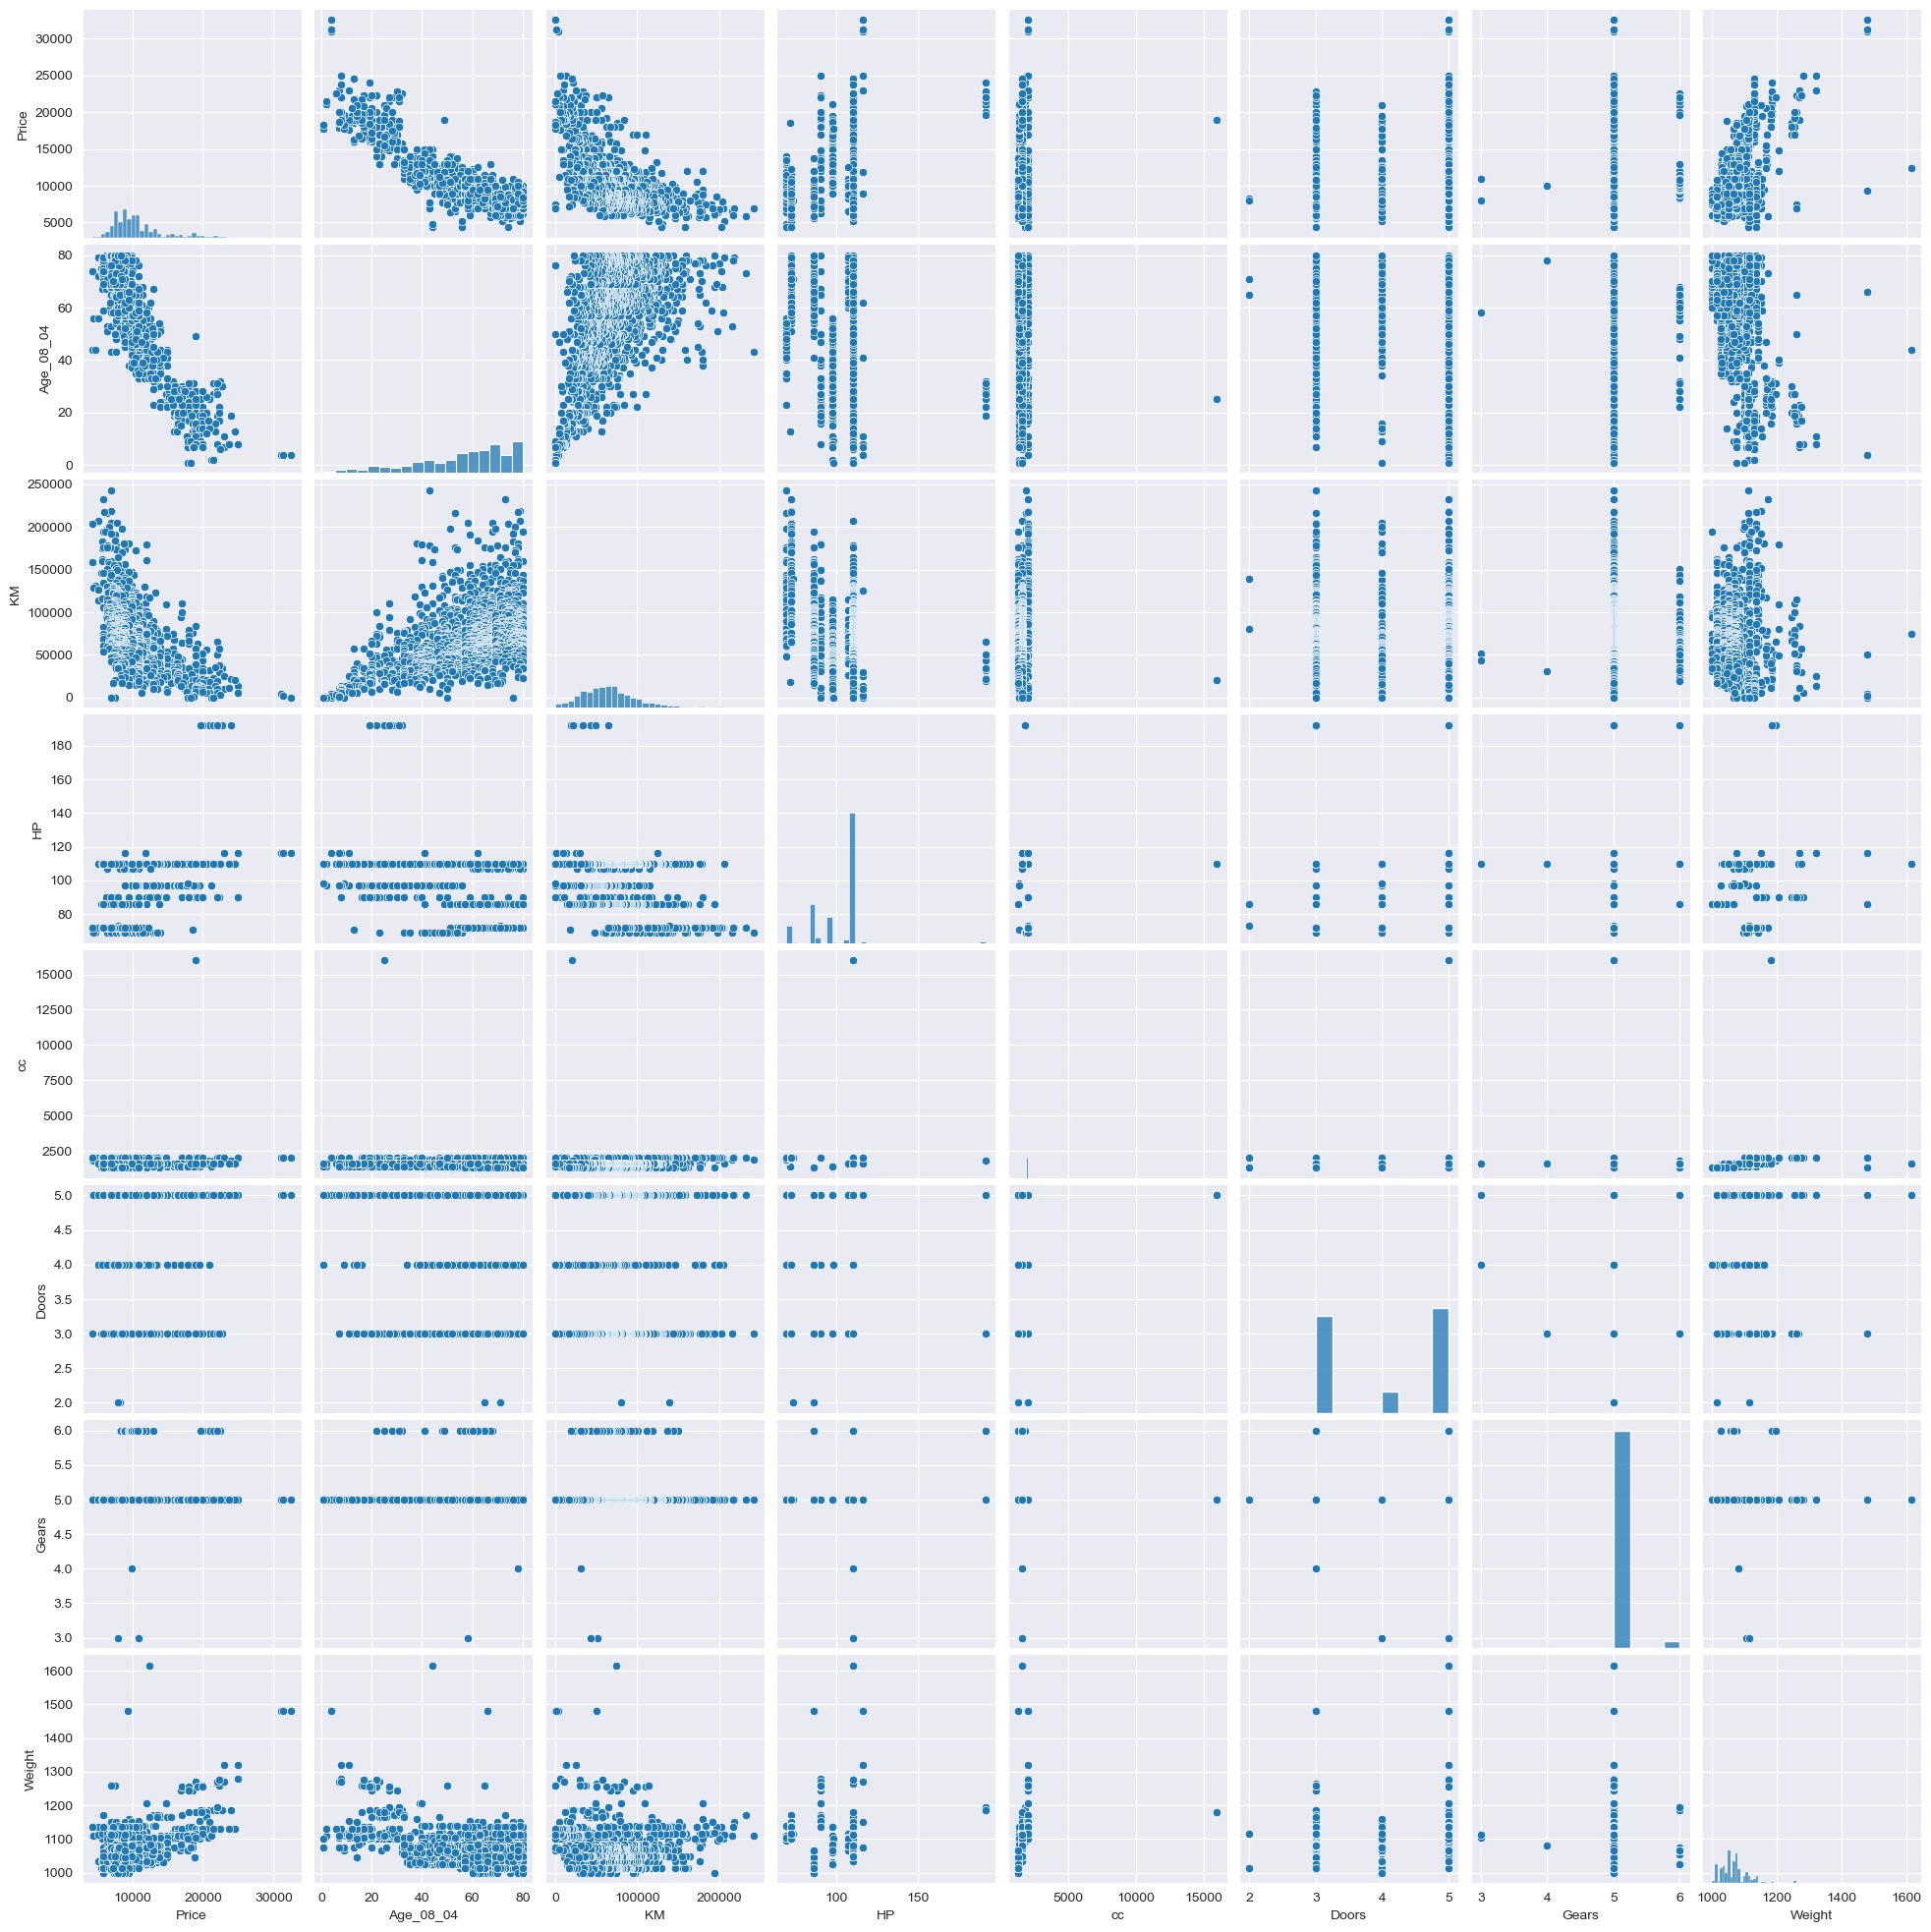

In [16]:
sns.set_style(style='darkgrid')  #Pair plot
sns.pairplot(data)

<Axes: >

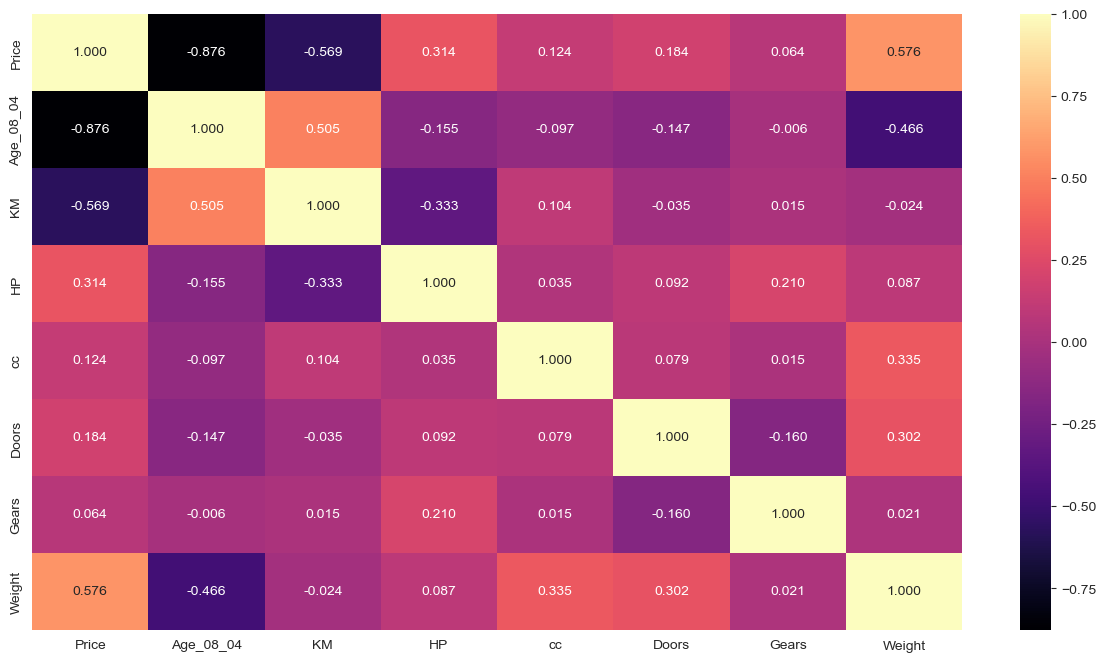

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data.corr(), cmap='magma', annot=True, fmt=".3f")   #Heatmap fmt=".no. of decimals" 

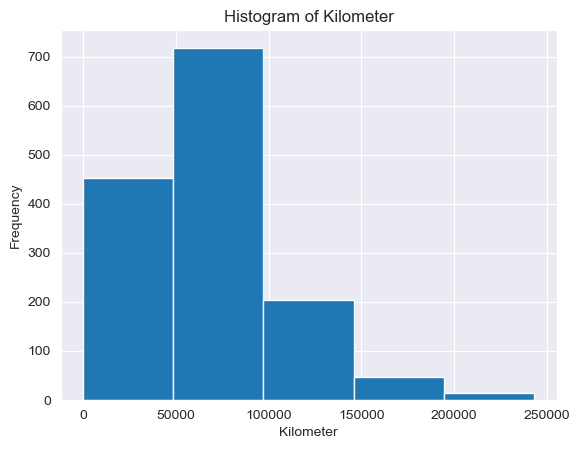

In [34]:
plt.hist(data['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

In [17]:
# 2. Splitting the dataset
X = data.drop(['Price'], axis=1)  # Features
y = data['Price']                  # Target variable

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 3. Building Multiple Linear Regression Models
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [20]:
# Model 2: Using selected features
# Here you can select specific features based on EDA or domain knowledge
selected_features = ['Age_08_04', 'KM', 'HP']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [21]:
model2 = LinearRegression()
model2.fit(X_train_selected, y_train)

LinearRegression()

In [22]:
# Model 3: Using all features with polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [24]:
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)


LinearRegression()

In [25]:
# 4. Evaluating Model Performance
# Predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test_selected)
y_pred3 = model3.predict(X_test_poly)

In [26]:
# Metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [27]:
mse1, r2_1 = evaluate_model(y_test, y_pred1)
mse2, r2_2 = evaluate_model(y_test, y_pred2)
mse3, r2_3 = evaluate_model(y_test, y_pred3)


In [28]:
print("Model 1 - MSE: {:.2f}, R-squared: {:.2f}".format(mse1, r2_1))
print("Model 2 - MSE: {:.2f}, R-squared: {:.2f}".format(mse2, r2_2))
print("Model 3 - MSE: {:.2f}, R-squared: {:.2f}".format(mse3, r2_3))

Model 1 - MSE: 1906630.76, R-squared: 0.84
Model 2 - MSE: 2363936.86, R-squared: 0.80
Model 3 - MSE: 1585221.54, R-squared: 0.87


In [29]:
# 5. Applying Lasso and Ridge Methods
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse, lasso_r2 = evaluate_model(y_test, lasso_pred)
print("Lasso - MSE: {:.2f}, R-squared: {:.2f}".format(lasso_mse, lasso_r2))

Lasso - MSE: 1906882.23, R-squared: 0.84


In [30]:
# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse, ridge_r2 = evaluate_model(y_test, ridge_pred)
print("Ridge - MSE: {:.2f}, R-squared: {:.2f}".format(ridge_mse, ridge_r2))

Ridge - MSE: 1906720.74, R-squared: 0.84
